In [1]:
# Author : Arthur Prigent
# Email: aprigent@geomar.de

In [2]:
from load_librairies import *
import xscale.signal.fitting as xsf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
lon_min = -40
lon_max = 5
lat_min = -3
lat_max = 3

period_str_1 = 1950
period_end_1 = 1999

period_str_2 = 2050
period_end_2 = 2099

def is_jja(month):
    return (month >= 6) & (month <= 8)
def is_mjj(month):
    return (month >= 5) & (month <= 7)

def relative_std(a, b):
    return (a - b) / a

######################
#      TO CHANGE     # 
######################
path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/reviews/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'

# STD SSTa

In [3]:
## Files created in
# scripts_tmp/create_file_std_ssta_uasa_CMIP6.ipynb
# scripts_tmp/create_file_std_ssta_uasa_CMIP5.ipynb

## SSTa ##

ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP5.nc')
ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'ssta_ssp5_monthly_CMIP5.nc')

ssta_atl3_hist_cmip6 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP6.nc')
ssta_atl3_ssp5_cmip6 = xr.open_dataset(path_data+'ssta_ssp585_monthly_CMIP6.nc')

In [4]:
## std SSTa in JJA ##

std_ssta_atl3_hist_cmip5_jja = ssta_atl3_hist_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip5['time.month'])).std(dim='time')

std_ssta_atl3_ssp5_cmip5_jja = ssta_atl3_ssp5_cmip5.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip5['time.month'])).std(dim='time')

std_ssta_atl3_hist_cmip6_jja = ssta_atl3_hist_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_hist_cmip6['time.month'])).std(dim='time')

std_ssta_atl3_ssp5_cmip6_jja = ssta_atl3_ssp5_cmip6.ssta.sel(time=is_jja(
    ssta_atl3_ssp5_cmip6['time.month'])).std(dim='time')

In [5]:
## Compute change in variability ## 

std_ssta_change_cmip5 = std_ssta_atl3_ssp5_cmip5_jja - std_ssta_atl3_hist_cmip5_jja
std_ssta_change_cmip6 = std_ssta_atl3_ssp5_cmip6_jja - std_ssta_atl3_hist_cmip6_jja


std_ssta_change_cmip5_new = ((std_ssta_atl3_ssp5_cmip5_jja - std_ssta_atl3_hist_cmip5_jja)/std_ssta_atl3_hist_cmip5_jja)*100
std_ssta_change_cmip6_new = ((std_ssta_atl3_ssp5_cmip6_jja - std_ssta_atl3_hist_cmip6_jja)/std_ssta_atl3_hist_cmip6_jja)*100

# BF3

In [6]:
##Files created in:
# scripts_tmp/3rd_Bjerknes_feedback_CMIP5_z20.ipynb
# scripts_tmp/3rd_Bjerknes_feedback_CMIP6_z20.ipynb

bf3_hist_cmip6_jja = xr.open_dataset(path_data+'bf3_hist_jja_CMIP6_z20.nc')
bf3_ssp5_cmip6_jja = xr.open_dataset(path_data+'bf3_ssp5_jja_CMIP6_z20.nc')


bf3_hist_cmip5_jja = xr.open_dataset(path_data+'bf3_hist_jja_CMIP5_z20.nc')
bf3_ssp5_cmip5_jja = xr.open_dataset(path_data+'bf3_ssp5_jja_CMIP5_z20.nc')

## changes in BF3 ##
bf3_changes_cmip6 = bf3_ssp5_cmip6_jja.alpha - bf3_hist_cmip6_jja.alpha
bf3_changes_cmip5 = bf3_ssp5_cmip5_jja.alpha - bf3_hist_cmip5_jja.alpha


# SST bias

In [7]:
##Files created in:
# scripts_tmp/create_SST_bias_file_CMIP5.ipynb
# scripts_tmp/create_SST_bias_file_CMIP6.ipynb

bias_jja_cmip5 = xr.open_dataset(path_data+'sst_bias_atl3_CMIP5_jja_dtd_new.nc')
bias_cmip5 = xr.open_dataset(path_data+'sst_bias_atl3_CMIP5_dtd_new.nc')

bias_jja_cmip6 = xr.open_dataset(path_data+'sst_bias_atl3_CMIP6_jja_dtd_new.nc')
bias_cmip6 = xr.open_dataset(path_data+'sst_bias_atl3_CMIP6_dtd_new.nc')


# SST change

In [8]:
## Files created in:
# scripts_tmp/create_sst_change_file.ipynb

sst_change_jja_cmip5 = xr.open_dataset(path_data+
    'sst_change_atl3_CMIP5_jja.nc')
sst_change_jja_cmip6 = xr.open_dataset(path_data+
    'sst_change_atl3_CMIP6_jja.nc')

# Make regressions

In [9]:
combined_bf3_CMIP5_CMIP6 = np.hstack((bf3_changes_cmip5.values,bf3_changes_cmip6.values))
combined_std_CMIP5_CMIP6 = np.hstack((std_ssta_change_cmip5.values,std_ssta_change_cmip6.values))
combined_bias_CMIP5_CMIP6 = np.hstack((bias_jja_cmip5.bias.values,bias_jja_cmip6.bias.values))
combined_sst_CMIP5_CMIP6 = np.hstack((sst_change_jja_cmip5.sst.values,sst_change_jja_cmip6.sst.values))

combined_std_CMIP5_CMIP6_new = np.hstack((std_ssta_change_cmip5_new.values,
                                          std_ssta_change_cmip6_new.values)) # relative change

In [10]:
## Std SST change vs SST bias ##
alpha1, interp1, r1, p_value1, std1 = stats.linregress(combined_bias_CMIP5_CMIP6,
                                                       combined_std_CMIP5_CMIP6)
## Std SST relative change vs SST bias ##
alpha1_new, interp1_new, r1_new, p_value1_new, std1_new = stats.linregress(combined_bias_CMIP5_CMIP6,
                                                       combined_std_CMIP5_CMIP6_new)

## BF3 change vs SST bias ##
alpha2, interp2, r2, p_value2, std2 = stats.linregress(combined_bias_CMIP5_CMIP6,
                                                       combined_bf3_CMIP5_CMIP6)

## BF3 change vs SST change ##
alpha3, interp3, r3, p_value3, std3 = stats.linregress(combined_sst_CMIP5_CMIP6,
                                                       combined_bf3_CMIP5_CMIP6)

## SST change vs SST bias ## 
alpha4, interp4, r4, p_value4, std4 = stats.linregress(combined_bias_CMIP5_CMIP6,
                                                       combined_sst_CMIP5_CMIP6)

In [11]:
x = np.arange(-5,6.1,0.1)

y1 = x * alpha1 + interp1
y2 = x * alpha2 + interp2
y3 = x * alpha3 + interp3
y4 = x * alpha4 + interp4

# Make resampling and confidence 95%

In [12]:

n_replicate = 10000
N = combined_bias_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bias_CMIP5_CMIP6[ind_resample],
                                                       combined_sst_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x[:, np.newaxis] + result[:, 1]
ci_forecast_bias_sst = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [13]:

n_replicate = 10000
N = combined_bias_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bias_CMIP5_CMIP6[ind_resample],
                                                       combined_bf3_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x[:, np.newaxis] + result[:, 1]
ci_forecast_bias_bf3 = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [14]:

n_replicate = 10000
N = combined_std_CMIP5_CMIP6_new.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_bias_CMIP5_CMIP6[ind_resample],
                                                       combined_std_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x[:, np.newaxis] + result[:, 1]
ci_forecast = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [15]:

n_replicate = 10000
N = combined_sst_CMIP5_CMIP6.shape[0]

index = list(range(N))

result = []
#
for i in range(n_replicate):
    ind_resample = np.random.choice(index, N)
    result.append(stats.linregress(combined_sst_CMIP5_CMIP6[ind_resample],
                                                       combined_bf3_CMIP5_CMIP6[ind_resample])[:2]
    )
#
result = np.array(result)
y_hat_distr = result[:, 0] * x[:, np.newaxis] + result[:, 1]
ci_forecast_sst_bf3 = np.percentile(y_hat_distr, (2.5, 97.5), axis=-1)

In [16]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(x)-2)



# Figure 5 

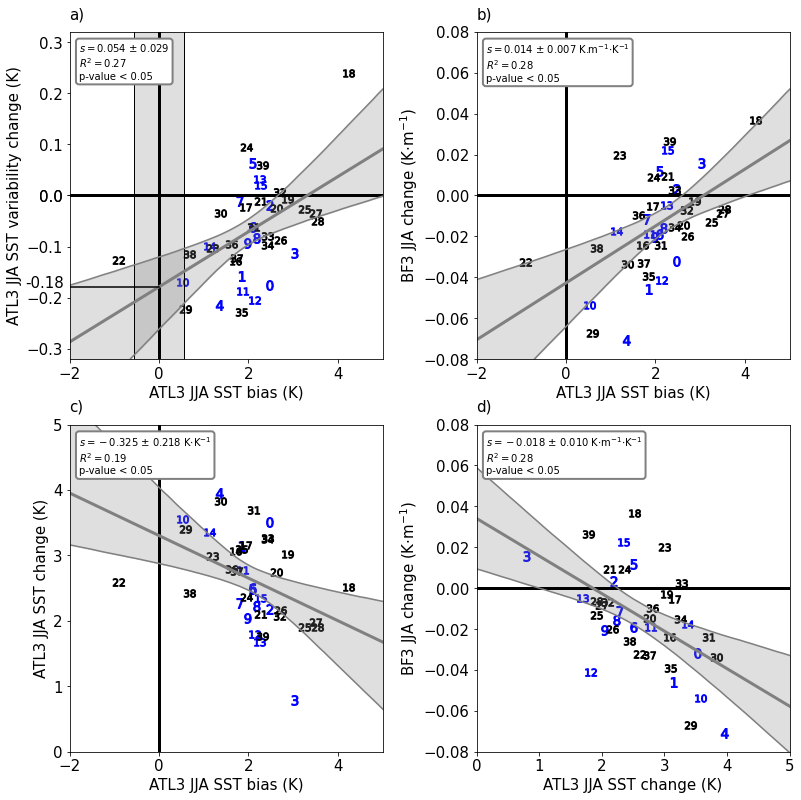

In [21]:
color_cmip5 = 'black'
color_cmip6 = 'blue'
ftz=15
m_cmip6 = np.arange(0,bias_jja_cmip6.bias.shape[0],1)
m_cmip5 = np.arange(bias_jja_cmip6.bias.shape[0],
                    bias_jja_cmip6.bias.shape[0] + bias_jja_cmip5.bias.shape[0],1)



f,ax = plt.subplots(2,2,figsize=[10,10])
ax=ax.ravel()
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.2,
                    wspace=0.3)

## figure a ##

for k in range(bias_jja_cmip6.bias.shape[0]):
    if k<10:
        ax[0].scatter(bias_jja_cmip6.bias[k],(std_ssta_atl3_ssp5_cmip6_jja[k] -
                          std_ssta_atl3_hist_cmip6_jja[k]),color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=100)
    else:
        ax[0].scatter(bias_jja_cmip6.bias[k],(std_ssta_atl3_ssp5_cmip6_jja[k] -
                          std_ssta_atl3_hist_cmip6_jja[k]),color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=150)



for i in range(bias_jja_cmip5.bias.shape[0]):
    ax[0].scatter(bias_jja_cmip5.bias[i],(std_ssta_atl3_ssp5_cmip5_jja[i] -
                      std_ssta_atl3_hist_cmip5_jja[i]),color=color_cmip5,
                          marker=r"$ {} $".format(
                m_cmip5[i]),s=150)

ax[0].axhline(0,color='black',linewidth=3)
ax[0].axvline(0,color='black',linewidth=3)
ax[0].axvline(0.56,color='black',linewidth=1)
ax[0].axvline(-0.56,color='black',linewidth=1)
y_range = np.arange(-0.32,0.33,0.01)
ax[0].fill_betweenx(y_range,0,0.56,color='grey',alpha=0.25)
ax[0].fill_betweenx(y_range,0,-0.56,color='grey',alpha=0.25)

ax[0].set_ylim([-0.32,0.32])
ax[0].set_xlim([-2,5])
ax[0].tick_params(labelsize=ftz)
ax[0].set_xlabel('ATL3 JJA SST bias (K)',fontsize=ftz)
ax[0].set_ylabel('ATL3 JJA SST variability change (K)',fontsize=ftz)
ax[0].set_yticks([-0.3,-0.2,np.round(interp1,0),-0.1,0,0.1,0.2,0.3])
ax[0].plot(x, ci_forecast[0], 'grey')
ax[0].plot(x, ci_forecast[1], 'grey')
ax[0].fill_between(x,y1,ci_forecast[0],color='grey',alpha=0.25)
ax[0].fill_between(x,y1,ci_forecast[1],color='grey',alpha=0.25)
ax[0].plot(x,y1,color='grey',linewidth=3)

textstr = '\n'.join((r'$s=%.3f$ $\pm$ %.3f' %
                     (alpha1, std1*ts),
                     r'$R^{2}=%.2f$' % (r1**2, ),
                    'p-value < 0.05'))
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2,alpha=1)

# place a text box in upper left in axes coords
ax[0].text(0.03,
         0.97,
         textstr,
         transform=ax[0].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)
ax[0].plot([-2,0],[np.round(interp1,2),np.round(interp1,2)],color='black')
ax[0].text(-3,np.round(interp1,2),str(np.round(interp1,2)),color='black',fontsize=ftz)


## figure b ##

for k in range(bias_jja_cmip6.bias.shape[0]):
    if k<10:
        ax[1].scatter(bias_jja_cmip6.bias[k],bf3_changes_cmip6[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=100)
    else:
        ax[1].scatter(bias_jja_cmip6.bias[k],bf3_changes_cmip6[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=150)



for i in range(bias_jja_cmip5.bias.shape[0]):
    ax[1].scatter(bias_jja_cmip5.bias[i],bf3_changes_cmip5[i],color=color_cmip5,
                          marker=r"$ {} $".format(
                m_cmip5[i]),s=150)

ax[1].axhline(0,color='black',linewidth=3)
ax[1].axvline(0,color='black',linewidth=3)

ax[1].plot(x, ci_forecast_bias_bf3[0], 'grey')
ax[1].plot(x, ci_forecast_bias_bf3[1], 'grey')
ax[1].fill_between(x,y2,ci_forecast_bias_bf3[0],color='grey',alpha=0.25)
ax[1].fill_between(x,y2,ci_forecast_bias_bf3[1],color='grey',alpha=0.25)
ax[1].tick_params(labelsize=ftz)
ax[1].set_xlabel('ATL3 JJA SST bias (K)',fontsize=ftz)
ax[1].set_ylabel('BF3 JJA change (K$\cdot$m$^{-1}$)',fontsize=ftz)
ax[1].set_ylim([-0.08,0.08])
ax[1].set_xlim([-2,5])
ax[1].plot(x,y2,color='grey',linewidth=3)


textstr = '\n'.join((r'$s=%.3f$ $\pm$ %.3f K.m$^{-1}$$\cdot$K$^{-1}$' %
                     (alpha2, std2*ts),
                     r'$R^{2}=%.2f$' % (r2**2, ),
                    'p-value < 0.05'))
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2,alpha=1)

# place a text box in upper left in axes coords
ax[1].text(0.03,
         0.97,
         textstr,
         transform=ax[1].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)



## figure c ##

for k in range(bias_jja_cmip6.bias.shape[0]):
    if k<10:
        ax[2].scatter(bias_jja_cmip6.bias[k],sst_change_jja_cmip6.sst[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=100)
    else:
        ax[2].scatter(bias_jja_cmip6.bias[k],sst_change_jja_cmip6.sst[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=150)



for i in range(bias_jja_cmip5.bias.shape[0]):
    ax[2].scatter(bias_jja_cmip5.bias[i],sst_change_jja_cmip5.sst[i],color=color_cmip5,
                          marker=r"$ {} $".format(
                m_cmip5[i]),s=150)

#ax[2].axhline(0,color='black')
ax[2].axvline(0,color='black',linewidth=3)

ax[2].tick_params(labelsize=ftz)
ax[2].set_xlabel('ATL3 JJA SST bias (K)',fontsize=ftz)
ax[2].set_ylabel('ATL3 JJA SST change (K)',fontsize=ftz)
ax[2].set_ylim([0,5])
ax[2].set_xlim([-2,5])
ax[2].plot(x,y4,color='grey',linewidth=3)
ax[2].plot(x, ci_forecast_bias_sst[0], 'grey')
ax[2].plot(x, ci_forecast_bias_sst[1], 'grey')
ax[2].fill_between(x,y4,ci_forecast_bias_sst[0],color='grey',alpha=0.25)
ax[2].fill_between(x,y4,ci_forecast_bias_sst[1],color='grey',alpha=0.25)

textstr = '\n'.join((r'$s=%.3f$ $\pm$ %.3f K$\cdot$K$^{-1}$' %
                     (alpha4, std4*ts),
                     r'$R^{2}=%.2f$' % (r4**2, ),
                    'p-value < 0.05'))
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2,alpha=1)

# place a text box in upper left in axes coords
ax[2].text(0.03,
         0.97,
         textstr,
         transform=ax[2].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)


## figure d ##

for k in range(bias_jja_cmip6.bias.shape[0]):
    if k<10:
        ax[3].scatter(sst_change_jja_cmip6.sst[k],bf3_changes_cmip6[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=100)
    else:
        ax[3].scatter(sst_change_jja_cmip6.sst[k],bf3_changes_cmip6[k],color=color_cmip6,
                              marker=r"$ {} $".format(
                    m_cmip6[k]),s=150)



for i in range(bias_jja_cmip5.bias.shape[0]):
    ax[3].scatter(sst_change_jja_cmip5.sst[i],bf3_changes_cmip5[i],color=color_cmip5,
                          marker=r"$ {} $".format(
                m_cmip5[i]),s=150)

ax[3].axhline(0,color='black',linewidth=3)
#ax[3].axvline(0,color='black')

ax[3].tick_params(labelsize=ftz)
ax[3].set_xlabel('ATL3 JJA SST change (K)',fontsize=ftz)
ax[3].set_ylabel('BF3 JJA change (K$\cdot$m$^{-1}$)',fontsize=ftz)
ax[3].set_ylim([-0.08,0.08])
ax[3].set_xlim([0,5])
#ax[2].plot(x,y2,color='green',linewidth=3)

ax[3].plot(x,y3,color='grey',linewidth=3)
ax[3].plot(x, ci_forecast_sst_bf3[0], 'grey')
ax[3].plot(x, ci_forecast_sst_bf3[1], 'grey')
ax[3].fill_between(x,y3,ci_forecast_sst_bf3[0],color='grey',alpha=0.25)
ax[3].fill_between(x,y3,ci_forecast_sst_bf3[1],color='grey',alpha=0.25)


textstr = '\n'.join((r'$s=%.3f$ $\pm$ %.3f K$\cdot$m$^{-1}$$\cdot$K$^{-1}$' %
                     (alpha3, std3*ts),
                     r'$R^{2}=%.2f$' % (r3**2, ),
                    'p-value < 0.05'))
props = dict(boxstyle='round', facecolor='white', ec='grey', lw=2,alpha=1)

# place a text box in upper left in axes coords
ax[3].text(0.03,
         0.97,
         textstr,
         transform=ax[3].transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)



ax[0].text(0,
         1.04, 'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,
         1.04, 'b)',transform=ax[1].transAxes,size=ftz)
ax[2].text(0,
         1.04, 'c)',transform=ax[2].transAxes,size=ftz)
ax[3].text(0,
         1.04, 'd)',transform=ax[3].transAxes,size=ftz)


plt.savefig(path_fig + 'figure_04_review.png',
             dpi = 300,
            bbox_inches='tight')

In [18]:
print('mean reduction is about ',np.round(1-(0.54-0.18)/0.54,2))

print('+/- ',np.round(1-(0.54-0.13)/0.54,2))

mean reduction is about  0.33
+/-  0.24


In [19]:
print('+/- ',np.round(1-(0.54-0.26)/0.54,2))

+/-  0.48


In [20]:
np.round(1-(0.54-0.26)/0.54,2)

0.48